In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from openpmd_viewer import OpenPMDTimeSeries

ts = OpenPMDTimeSeries("/data/gc/rocksdb-index/WarpX/build/bin/diags/diag2/")

geos_ts = OpenPMDTimeSeries("/data/gc/rocksdb-index/WarpX/build/bin/diags/diag2/", backend='openpmd-api', geos_index=True,
                       rocksdb_path="/data/gc/rocksdb-index/WarpX/build/bin/diags/diag2/rocksdb")

Open RocksDB successfully! DB path: /data/gc/rocksdb-index/WarpX/build/bin/diags/diag2/rocksdb


read data from disk: z
read data from disk: uz

read data from disk: w


/data/gc/rocksdb-index/openPMD-viewer/openpmd_viewer/openpmd_timeseries/plotter.py:406: UserWarning: 
CIC particle histogramming is unavailable because 
Numba is not installed. NGP histogramming is used instead.
Please considering installing numba (e.g. `pip install numba`)
  warnings.warn(


the number of particles is: 29007072
CPU times: user 38.4 s, sys: 927 ms, total: 39.3 s
Wall time: 39.2 s


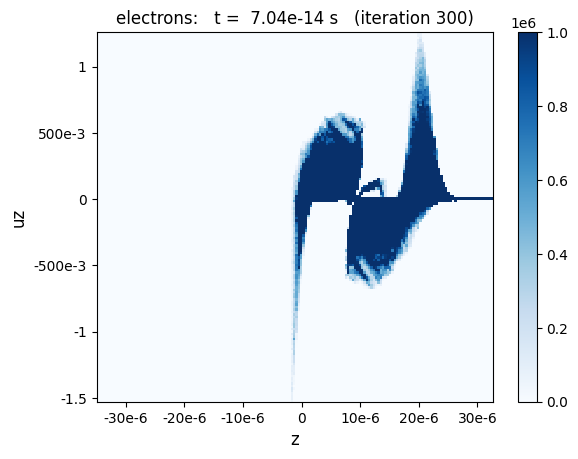

In [2]:
%%time
z_all, uz_all = ts.get_particle( ['z', 'uz'], species='electrons', iteration=300, plot=True, vmax=1e6 )
print(f"the number of particles is: {len(z_all)}")

## 1. One dimension select criteria, e.g. select={'z': xx to xx } in this case

### i) Default openPMD-viewer

In [3]:
%%time
z_selected, uz_selected = ts.get_particle( ['z', 'uz'], species='electrons',
                            iteration=300, select={'z':[2.05e-6, 2.10e-6]})

read data from disk: z
read data from disk: uz
read data from disk: z

CPU times: user 37.3 s, sys: 674 ms, total: 38 s
Wall time: 37.9 s


the number of ts selected particles is: 23246
the proportion is: 0.0008013907780833584


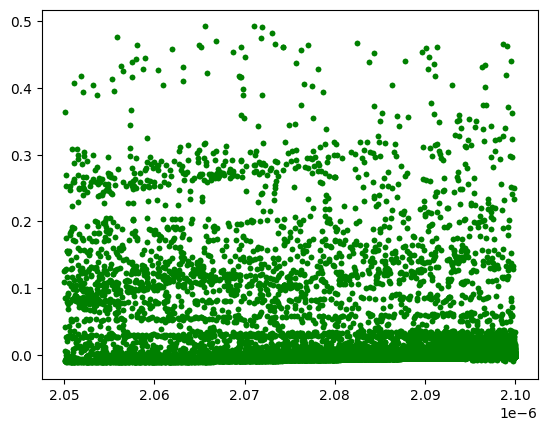

In [4]:
print(f"the number of ts selected particles is: {len(z_selected)}")
print(f"the proportion is: {len(z_selected) / len(z_all)}")
plt.plot(z_selected, uz_selected, 'g.')

### ii) Spatial Index, only block level r-tree

In [5]:
%%time
z_selected, uz_selected = geos_ts.get_particle( ['z', 'uz'], species='electrons',
                            iteration=300, select={'z':[2.05e-6, 2.10e-6]},  direct_block_read=True, only_first_level=True)

read data from disk: z
first level match num: 264
read data from disk: uz


CPU times: user 885 ms, sys: 28.5 ms, total: 913 ms
Wall time: 912 ms


the number of ts selected particles is: 23246
the proportion is: 0.0008013907780833584


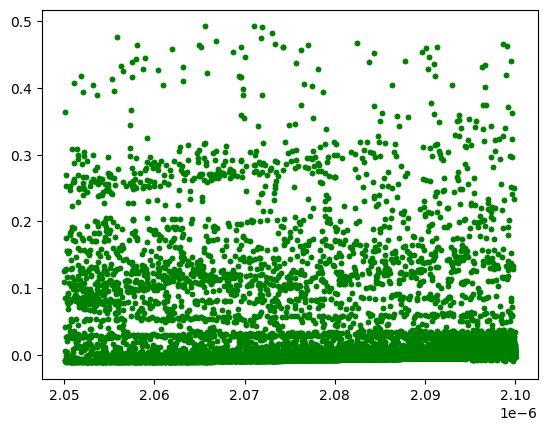

In [6]:
print(f"the number of ts selected particles is: {len(z_selected)}")
print(f"the proportion is: {len(z_selected) / len(z_all)}")
plt.plot(z_selected, uz_selected, 'g.')

### ii) Spatial Index, two level r-tree

In [7]:
%%time
z_selected, uz_selected = geos_ts.get_particle( ['z', 'uz'], species='electrons',
                            iteration=300, select={'z':[2.05e-6, 2.10e-6]},  direct_block_read=True)

first level match num: 264
read data from disk: z
read data from disk: uz


CPU times: user 1.15 s, sys: 19.8 ms, total: 1.17 s
Wall time: 1.16 s


the number of ts selected particles is: 23246
the proportion is: 0.0008013907780833584


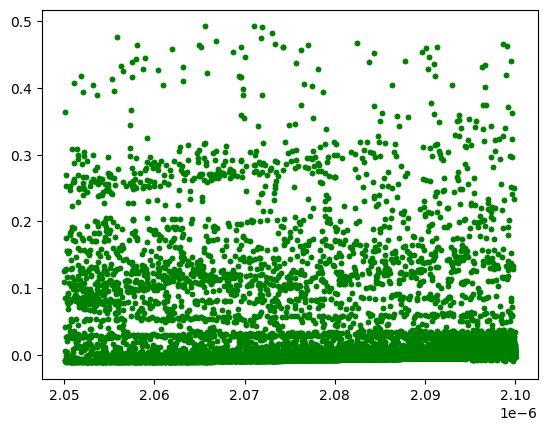

In [8]:
print(f"the number of ts selected particles is: {len(z_selected)}")
print(f"the proportion is: {len(z_selected) / len(z_all)}")
plt.plot(z_selected, uz_selected, 'g.')

## 2. Three dimension select criteria, e.g. select={'z': xx to xx, 'y', 'x' } in this case

### i) Default openPMD-viewer

In [9]:
%%time
z_selected, uz_selected = ts.get_particle( ['z', 'uz'], species='electrons',
                            iteration=300, select={'x':[5e-6, 10e-6], 'y':[-10e-6, -5e-6], 'z':[15e-6, 25e-6]})

read data from disk: z
read data from disk: uz
read data from disk: x
read data from disk: y
read data from disk: z

CPU times: user 1min 3s, sys: 1.04 s, total: 1min 4s
Wall time: 1min 3s


the number of ts selected particles is: 138984
the proportion is: 0.004791383287496236


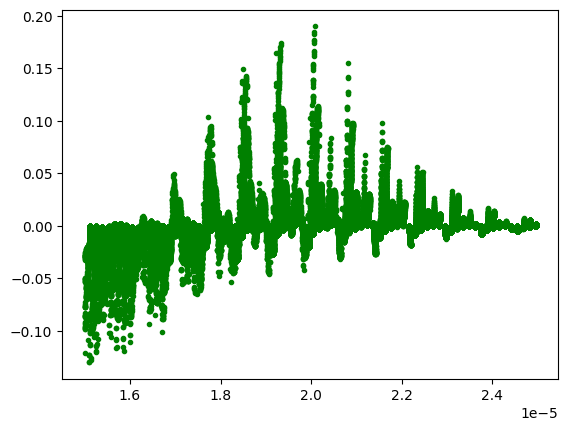

In [10]:
print(f"the number of ts selected particles is: {len(z_selected)}")
print(f"the proportion is: {len(z_selected) / len(z_all)}")
plt.plot(z_selected, uz_selected, 'g.')

### ii) Spatial Index, only block level r-tree

In [11]:
%%time
z_selected, uz_selected = geos_ts.get_particle( ['z', 'uz'], species='electrons',
                            iteration=300, select={'x':[5e-6, 10e-6], 'y':[-10e-6, -5e-6], 'z':[15e-6, 25e-6]},
                                                direct_block_read=True, only_first_level=True)

first level match num: 120
read data from disk: z
read data from disk: uz
read data from disk: y
read data from disk: x


CPU times: user 829 ms, sys: 24 ms, total: 853 ms
Wall time: 851 ms


the number of ts selected particles is: 138984
the proportion is: 0.004791383287496236


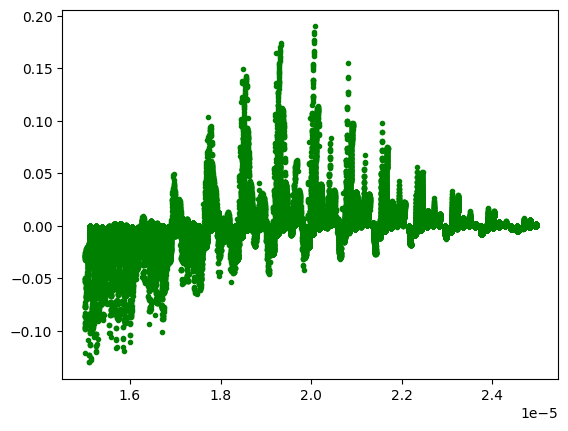

In [12]:
print(f"the number of ts selected particles is: {len(z_selected)}")
print(f"the proportion is: {len(z_selected) / len(z_all)}")
plt.plot(z_selected, uz_selected, 'g.')

### ii) Spatial Index, two level r-tree

In [13]:
%%time
z_selected, uz_selected = geos_ts.get_particle( ['z', 'uz'], species='electrons',
                            iteration=300, select={'x':[5e-6, 10e-6], 'y':[-10e-6, -5e-6], 'z':[15e-6, 25e-6]}, direct_block_read=True)

read data from disk: z
first level match num: 120
read data from disk: uz
read data from disk: y
read data from disk: x


CPU times: user 981 ms, sys: 27.7 ms, total: 1.01 s
Wall time: 1.01 s


the number of ts selected particles is: 138984
the proportion is: 0.004791383287496236


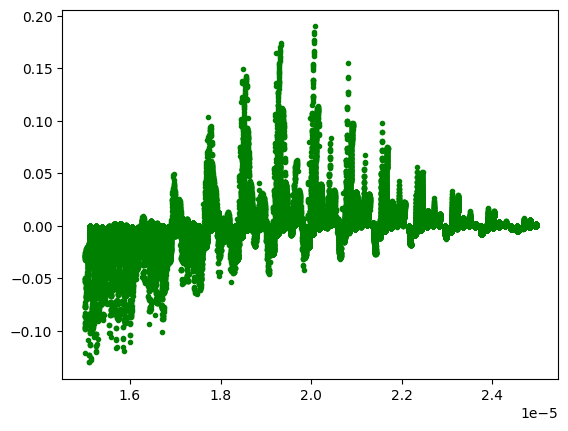

In [14]:
print(f"the number of ts selected particles is: {len(z_selected)}")
print(f"the proportion is: {len(z_selected) / len(z_all)}")
plt.plot(z_selected, uz_selected, 'g.')

## 3. Two kinds of select criteria, e.g. select={'z': xx to xx, 'uz'} in this case

### i) Default openPMD-viewer

In [15]:
%%time
z_selected, uz_selected = ts.get_particle( ['z', 'uz'], species='electrons',
                            iteration=300, select={'z':[19e-6, 21e-6], 'uz':[0.7, 1.0]})

read data from disk: z
read data from disk: uz
read data from disk: z
read data from disk: uz

CPU times: user 50.6 s, sys: 877 ms, total: 51.4 s
Wall time: 51.3 s


the number of ts selected particles is: 12158
the proportion is: 0.0004191391671658553


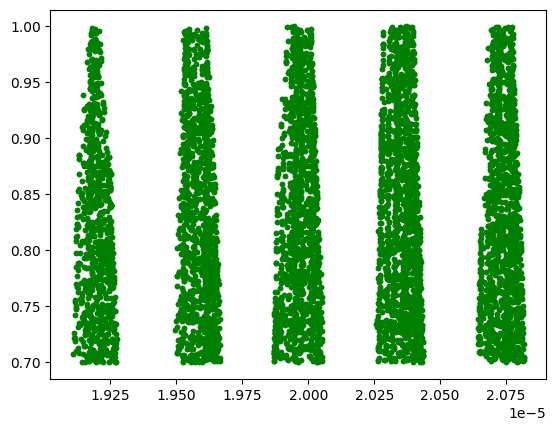

In [16]:
print(f"the number of ts selected particles is: {len(z_selected)}")
print(f"the proportion is: {len(z_selected) / len(z_all)}")
plt.plot(z_selected, uz_selected, 'g.')

### ii) Spatial Index, only block level r-tree

In [17]:
%%time
z_selected, uz_selected = geos_ts.get_particle( ['z', 'uz'], species='electrons',
                            iteration=300, select={'z':[19e-6, 21e-6], 'uz':[0.7, 1.0]},
                                                direct_block_read=True, only_first_level=True)

first level match num: 792
first level match num: 78
read data from disk: z
read data from disk: uz


CPU times: user 253 ms, sys: 24 ms, total: 277 ms
Wall time: 276 ms


the number of ts selected particles is: 12158
the proportion is: 0.0004191391671658553


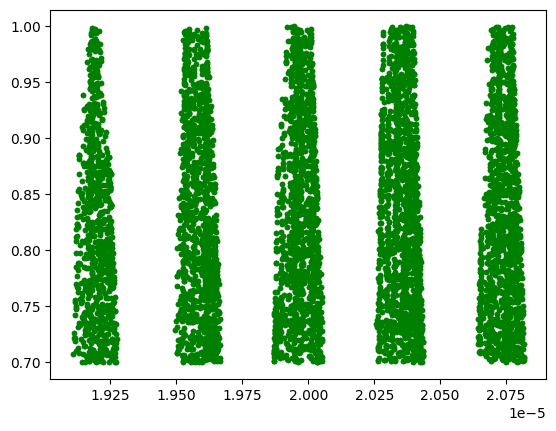

In [18]:
print(f"the number of ts selected particles is: {len(z_selected)}")
print(f"the proportion is: {len(z_selected) / len(z_all)}")
plt.plot(z_selected, uz_selected, 'g.')

### ii) Spatial Index, two level r-tree

In [19]:
%%time
z_selected, uz_selected = geos_ts.get_particle( ['z', 'uz'], species='electrons',
                            iteration=300, select={'z':[19e-6, 21e-6], 'uz':[0.7, 1.0]}, direct_block_read=True)

first level match num: 792
first level match num: 78
read data from disk: z
read data from disk: uz


CPU times: user 541 ms, sys: 55.8 ms, total: 596 ms
Wall time: 594 ms


the number of ts selected particles is: 12158
the proportion is: 0.0004191391671658553


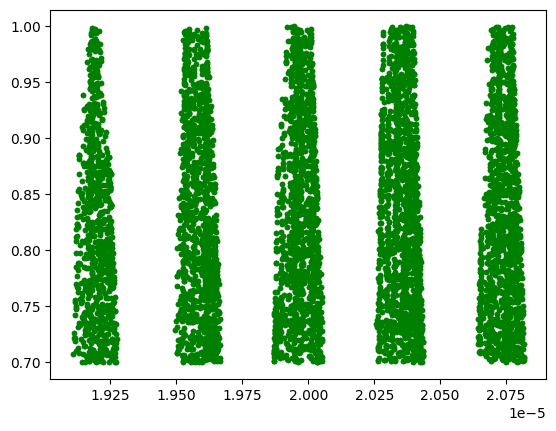

In [20]:
print(f"the number of ts selected particles is: {len(z_selected)}")
print(f"the proportion is: {len(z_selected) / len(z_all)}")
plt.plot(z_selected, uz_selected, 'g.')

## 4. Two kinds of 3 dimensional select criteria, e.g. select={'z': xx to xx, 'y', 'x', 'ux', 'uy' 'uz'} in this case

### i) Default openPMD-viewer

In [21]:
%%time
z_selected, uz_selected = ts.get_particle( ['z', 'uz'], species='electrons',
                            iteration=300, select={'x':[5e-6, 10e-6], 'y':[5e-6, 10e-6], 'z':[15e-6, 30e-6],
                                                   'ux':[0.0, 0.01], 'uy':[0.0, 0.01], 'uz':[0.0, 0.01]})

read data from disk: z
read data from disk: uz
read data from disk: x
read data from disk: y
read data from disk: z
read data from disk: ux
read data from disk: uy
read data from disk: uz

CPU times: user 1min 40s, sys: 1.86 s, total: 1min 42s
Wall time: 1min 41s


the number of ts selected particles is: 6845
the proportion is: 0.0002359769369345517


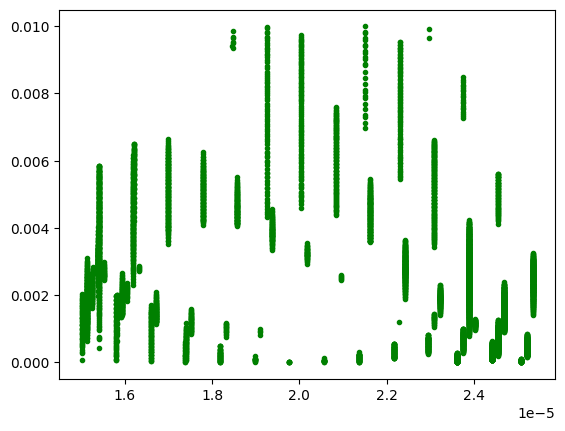

In [22]:
print(f"the number of ts selected particles is: {len(z_selected)}")
print(f"the proportion is: {len(z_selected) / len(z_all)}")
plt.plot(z_selected, uz_selected, 'g.')

### ii) Spatial Index, only block level r-tree

In [25]:
%%time
z_selected, uz_selected = geos_ts.get_particle( ['z', 'uz'], species='electrons',
                            iteration=300, select={'x':[5e-6, 10e-6], 'y':[5e-6, 10e-6], 'z':[15e-6, 30e-6],
                                                   'ux':[0.0, 0.01], 'uy':[0.0, 0.01], 'uz':[0.0, 0.01]},
                                                direct_block_read=True, only_first_level=True)

first level match num: 180
first level match num: 4192
read data from disk: uy
read data from disk: z
read data from disk: y
read data from disk: x
read data from disk: ux
read data from disk: uz


CPU times: user 1.44 s, sys: 12 ms, total: 1.45 s
Wall time: 1.45 s


the number of ts selected particles is: 6845
the proportion is: 0.0002359769369345517


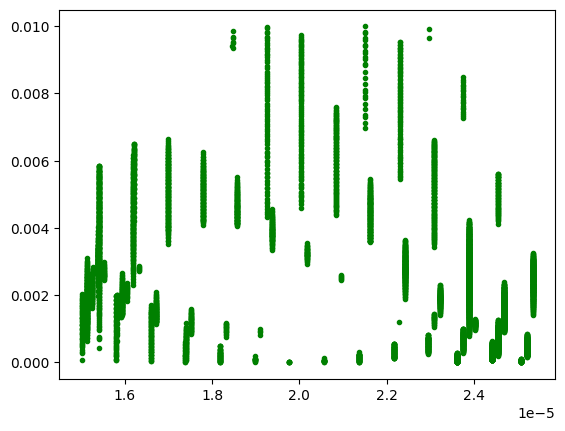

In [24]:
print(f"the number of ts selected particles is: {len(z_selected)}")
print(f"the proportion is: {len(z_selected) / len(z_all)}")
plt.plot(z_selected, uz_selected, 'g.')

### ii) Spatial Index, two level r-tree

In [26]:
%%time
z_selected, uz_selected = geos_ts.get_particle( ['z', 'uz'], species='electrons',
                            iteration=300, select={'x':[5e-6, 10e-6], 'y':[5e-6, 10e-6], 'z':[15e-6, 30e-6],
                                                   'ux':[0.0, 0.01], 'uy':[0.0, 0.01], 'uz':[0.0, 0.01]}, direct_block_read=True)

first level match num: 180
first level match num: 4192
read data from disk: uy
read data from disk: z
read data from disk: y
read data from disk: x
read data from disk: ux
read data from disk: uz


CPU times: user 3.02 s, sys: 244 ms, total: 3.26 s
Wall time: 3.25 s


the number of ts selected particles is: 6845
the proportion is: 0.0002359769369345517


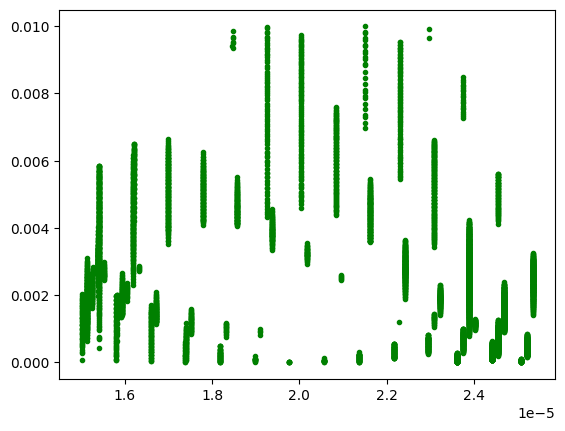

In [27]:
print(f"the number of ts selected particles is: {len(z_selected)}")
print(f"the proportion is: {len(z_selected) / len(z_all)}")
plt.plot(z_selected, uz_selected, 'g.')